# Analysis of cost of living for city of San Fransisco



## Objective:

The analysis is being conducted by this The San Fransisco Chronicle newspaper to analyze the cost of living in the city of San Francisco, which is mainly driven by Income & Housing cost.

The objective of this report is to analyze and present key insights into the income landscape of San Francisco to The San Francisco Chronicle. Specifically, the report will focus on understanding income disparities, trends, and variations across different job types and groups within the city. By examining salaries, net incomes, overtime, retirement benefits, total compensation, and related factors, the report aims to provide a comprehensive view of the income dynamics in San Francisco. These insights generated through following steps will contribute to the broader analysis of the cost of living in the city, helping readers understand the income-related challenges and opportunities residents face.
The analysis was conducted using historical data of employment for the city from year 2013 to 2020.











## Data Exploration


Exploring different parts of the data and drawing insights from it.



In [ ]:
 #installtion of various libraries of R which will enable to use different functions
library(dplyr)
library(ggplot2)
library(tidyverse)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
✔ readr     2.1.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading the data and naming it as 'dataset'. viewing first few rows of the data using function head()


In [ ]:
dataset <- read.csv("/content/employee-compensation.csv")
head(dataset,3)

,Organization.Group.Code,Job.Family.Code,Job.Code,Year.Type,Year,Organization.Group,Department.Code,Department,Union.Code,Union,⋯,Employee.Identifier,Salaries,Overtime,Other.Salaries,Total.Salary,Retirement,Health.and.Dental,Other.Benefits,Total.Benefits,Total.Compensation
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,⋯,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21,"Prof & Tech Engineers - Miscellaneous, Local 21",⋯,37730,57534.65,0,0,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
2,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21,"Prof & Tech Engineers - Miscellaneous, Local 21",⋯,26574,57678.50,0,0,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
3,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21,"Prof & Tech Engineers - Miscellaneous, Local 21",⋯,8148,63532.93,0,0,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71


Display number of rows & columns in data set using the function dim()

In [ ]:
dim(dataset)

[1] 683277     22

Know names of the columns to know attributes of the data using colnames()

In [ ]:
colnames(dataset)

[1] "Organization.Group.Code" "Job.Family.Code"        
 [3] "Job.Code"                "Year.Type"              
 [5] "Year"                    "Organization.Group"     
 [7] "Department.Code"         "Department"             
 [9] "Union.Code"              "Union"                  
[11] "Job.Family"              "Job"                    
[13] "Employee.Identifier"     "Salaries"               
[15] "Overtime"                "Other.Salaries"         
[17] "Total.Salary"            "Retirement"             
[19] "Health.and.Dental"       "Other.Benefits"         
[21] "Total.Benefits"          "Total.Compensation"

Explanation of column names is derived from the another data set accompanying the main data set:

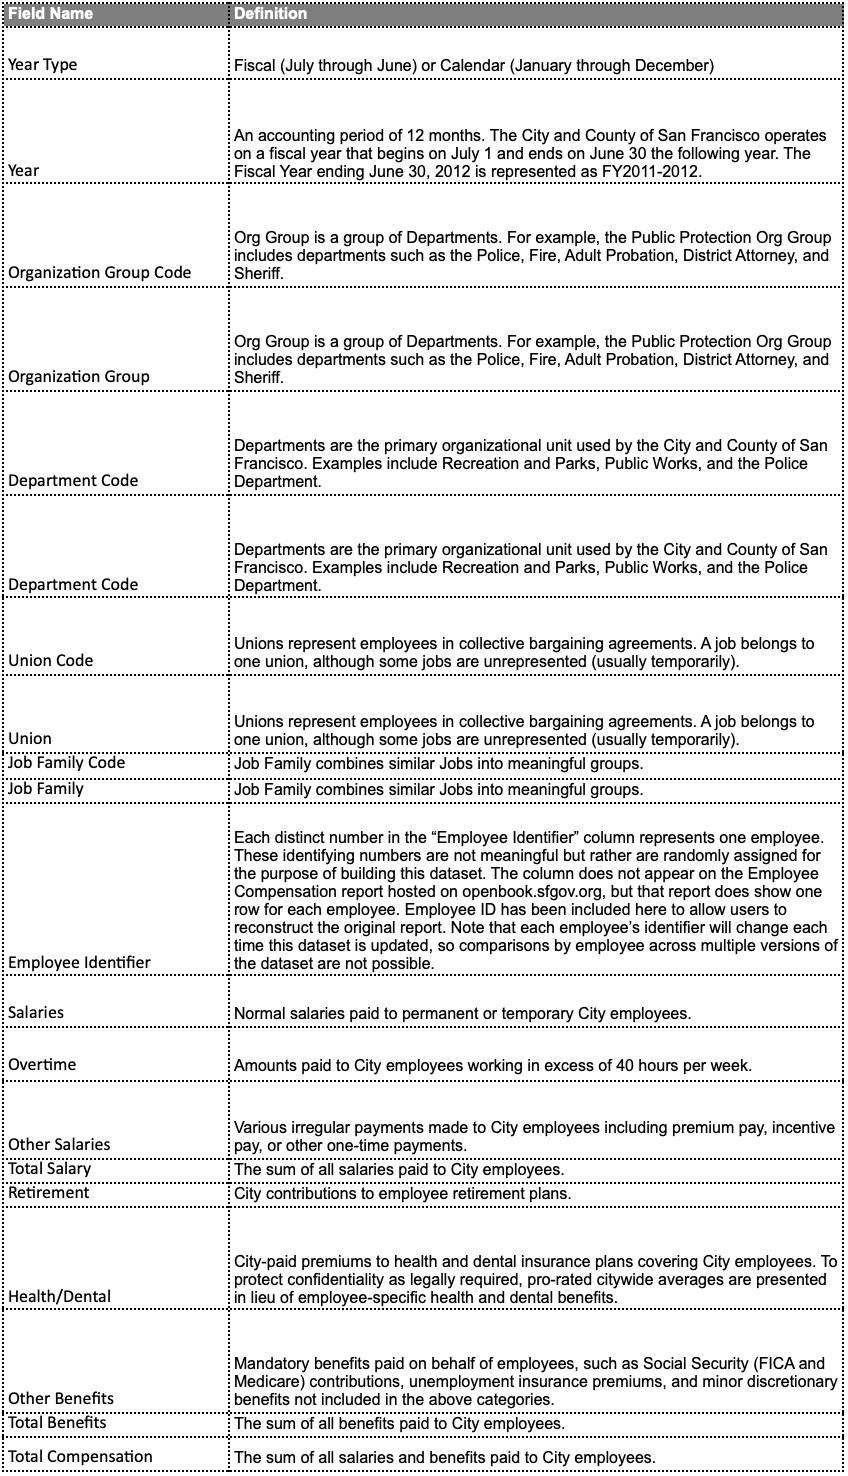

Statistical insights about the data


In [ ]:
#summary function
summary(dataset)

 Organization.Group.Code Job.Family.Code      Job.Code        
 Min.   :1.000           Length:86195       Length:86195      
 1st Qu.:2.000           Class :character   Class :character  
 Median :2.000           Mode  :character   Mode  :character  
 Mean   :2.869                                                
 3rd Qu.:4.000                                                
 Max.   :7.000                                                
                                                              
  Year.Type              Year      Organization.Group Department.Code   
 Length:86195       Min.   :2013   Length:86195       Length:86195      
 Class :character   1st Qu.:2013   Class :character   Class :character  
 Mode  :character   Median :2014   Mode  :character   Mode  :character  
                    Mean   :2014                                        
                    3rd Qu.:2014                                        
                    Max.   :2015                          

To have more insights about the data for better understanding

In [ ]:
#insights using glimpse() function
glimpse(dataset)

Rows: 86,195
Columns: 22
$ Organization.Group.Code <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ Job.Family.Code         <chr> "1000", "1000", "1000", "1000", "1000", "1000"…
$ Job.Code                <chr> "1021", "1023", "1031", "1054", "1062", "1064"…
$ Year.Type               <chr> "Calendar", "Calendar", "Calendar", "Calendar"…
$ Year                    <int> 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013…
$ Organization.Group      <chr> "Public Protection", "Public Protection", "Pub…
$ Department.Code         <chr> "ADP", "ADP", "ADP", "ADP", "ADP", "ADP", "ADP…
$ Department              <chr> "ADP Adult Probation", "ADP Adult Probation", …
$ Union.Code              <int> 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21…
$ Union                   <chr> "Prof & Tech Engineers - Miscellaneous, Local …
$ Job.Family              <chr> "Information Systems", "Information Systems", …
$ Job                     <chr> "IS Administrator 1", "IS Administrator 3", "I…
$ Employee.Iden

Some more information about the data set. E.g. Finding number of Job groups. This information may be helpful to understand criteria for subsetting data



In [ ]:
Job_Group_Nos <- unique(dataset$Job.Family)
cat("Number of Job Groups:", length(Job_Group_Nos), "\n")



Number of Job Groups: 59 


Extracting statistically important information like median, mean, min salary & max salary of the column salary & other similar columns

In [ ]:
#finding median & other stat info of column Salary
summary(dataset$Total.Salary)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  -2596   27723   69411   73406  105670  471953       1 

In [ ]:
#finding median & other stat info of column Total compensation

summary(dataset$Total.Compensation)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  -8966   39566  100376  100651  145006  510574       1 

Displaying names of labels under Organization Groups


In [ ]:
Organization_Group_Names <- unique(dataset$Organization.Group)
print(Organization_Group_Names)

[1] "Public Protection"                       
[2] "Public Works, Transportation & Commerce" 
[3] "Human Welfare & Neighborhood Development"
[4] "Community Health"                        
[5] "Culture & Recreation"                    
[6] "General Administration & Finance"        
[7] "General City Responsibilities"           


#5 Subsets

Subset of top earning employees (first 10 entries) based on Total Compensation.
It can be seen from the displayed rows that 'General Administration & Finance' dominates the list of top earning followed by 'Public Protection Group'.


In [ ]:
top_earners <- dataset[order(dataset$Total.Compensation, decreasing = TRUE), ][1:10, ]
head(top_earners,10)


,Organization.Group.Code,Job.Family.Code,Job.Code,Year.Type,Year,Organization.Group,Department.Code,Department,Union.Code,Union,⋯,Employee.Identifier,Salaries,Overtime,Other.Salaries,Total.Salary,Retirement,Health.and.Dental,Other.Benefits,Total.Benefits,Total.Compensation
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,⋯,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
44071,1,Q000,0402,Calendar,2014,Public Protection,POL,POL Police,911,Police Officers' Association,⋯,53403,129150.0,0.00,342802.63,471952.6,27477.98,6276.42,4867.41,38621.81,510574.5
80666,6,1100,1119,Calendar,2014,General Administration & Finance,RET,RET Retirement System,351,Municipal Executive Association - Miscellaneous,⋯,25997,339653.7,0.00,0.00,339653.7,73203.06,11548.59,20697.05,105448.70,445102.4
77899,6,2500,2598,Calendar,2014,General Administration & Finance,ADM,ADM Gen Svcs Agency-City Admin,164,Physicians and Dentists - Miscellaneous,⋯,19393,270222.0,6009.22,67956.20,344187.5,57717.10,13054.94,13297.32,84069.36,428256.8
41304,1,0900,0140,Calendar,2014,Public Protection,FIR,FIR Fire Department,352,Municipal Executive Association - Fire,⋯,23490,302068.0,0.00,24165.44,326233.4,68064.34,13054.94,14585.04,95704.32,421937.8
1392,1,0900,0140,Calendar,2013,Public Protection,FIR,FIR Fire Department,352,Municipal Executive Association - Fire,⋯,23490,313686.0,0.00,23236.00,336922.0,63762.48,12918.24,5606.86,82287.58,419209.6
82750,1,0900,0140,Calendar,2015,Public Protection,FIR,FIR Fire Department,352,Municipal Executive Association - Fire,⋯,23490,303494.8,0.00,24279.58,327774.4,64401.62,12424.50,14243.86,91069.98,418844.4
3622,1,0900,0390,Calendar,2013,Public Protection,POL,POL Police,353,Municipal Executive Association - Police,⋯,51150,319275.0,0.00,20007.06,339282.1,64186.52,12918.24,1859.05,78963.81,418245.9
43585,1,0900,0390,Calendar,2014,Public Protection,POL,POL Police,353,Municipal Executive Association - Police,⋯,51150,307450.0,0.00,19266.72,326716.8,68165.14,13054.94,9951.70,91171.78,417888.5
85161,1,0900,0390,Calendar,2015,Public Protection,POL,POL Police,353,Municipal Executive Association - Police,⋯,51150,308901.4,0.00,19354.12,328255.6,64496.13,12424.50,9614.84,86535.47,414791.0


Subset of lowest earning employees (last 20 entries) based on Salaries. It can be seen from the data that there is no dominance of any particular group when it comes to lowest salary


In [ ]:
lowest_earners <- dataset[order(dataset$Salaries), ][1:20, ]
head(lowest_earners,20)

,Organization.Group.Code,Job.Family.Code,Job.Code,Year.Type,Year,Organization.Group,Department.Code,Department,Union.Code,Union,⋯,Employee.Identifier,Salaries,Overtime,Other.Salaries,Total.Salary,Retirement,Health.and.Dental,Other.Benefits,Total.Benefits,Total.Compensation
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,⋯,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
339030,1,0900,0114,Fiscal,2014,Public Protection,FIR,FIR Fire Department,323,Members of Boards and Commissions,⋯,2642,-68771.78,0.0,0.00,-68771.78,0.00,17.98,-5328.81,-5310.83,-74082.61
469554,1,8100,8177,Fiscal,2017,Public Protection,PDR,PDR Public Defender,311,Municipal Attorneys' Association,⋯,55467,-33808.20,0.0,0.00,-33808.20,-6129.43,0.00,-2677.61,-8807.04,-42615.24
515007,1,8100,8177,Fiscal,2017,Public Protection,PDR,Public Defender,311,Municipal Attorneys Assoc,⋯,36974277,-33808.20,0.0,0.00,-33808.20,-6129.43,20151.02,-2677.61,11343.98,-22464.22
631074,4,2300,P103,Fiscal,2019,Community Health,DPH,Public Health,791,"SEIU, Local 1021, RN",⋯,37676352,-24605.54,0.0,0.00,-24605.54,0.00,0.00,-1909.78,-1909.78,-26515.32
343473,1,Q000,Q004,Fiscal,2014,Public Protection,POL,POL Police,911,Police Officers' Association,⋯,42566,-18437.73,0.0,44786.82,26349.09,-3271.70,0.00,-46.09,-3317.79,23031.30
321339,3,2900,2996,Fiscal,2013,Human Welfare & Neighborhood Development,HRC,HRC Human Rights Commission,790,"SEIU - Miscellaneous, Local 1021",⋯,53961,-17635.32,0.0,782.28,-16853.04,-3190.24,-2940.47,-1378.51,-7509.22,-24362.26
592988,6,0900,0923,Fiscal,2018,General Administration & Finance,ADM,Administrative Services,351,"Municipal Exec Assoc, Misc",⋯,37004293,-15528.00,0.0,3158.62,-13948.69,-2756.22,5220.62,-1170.72,1293.68,-12655.01
642401,1,0900,0150,Fiscal,2020,Public Protection,FIR,Fire Department,352,"Municipal Exec Assoc, Fire",⋯,40266669,-10854.00,0.0,22576.32,868.32,0.00,0.00,14.94,14.94,883.26
256992,1,H000,H033,Calendar,2019,Public Protection,FIR,Fire Department,798,"Firefighters,Local 798, Unit 1",⋯,38776288,-9942.33,0.0,89444.19,47285.82,0.00,0.00,0.00,0.00,47285.82


Subset of top earning employees in terms of retirement benefits (first 10 entries).

*   Observing the entries, the year wise trend can be seen. E.g. all top earning employees in terms of retirement benefits belong to the year bracket between 2013-2015.
*   There is no particular observable insight regarding group




In [ ]:
top_retirement_contrib <- dataset[order(dataset$Retirement, decreasing = TRUE), ][1:10, ]
head(top_retirement_contrib,10)


,Organization.Group.Code,Job.Family.Code,Job.Code,Year.Type,Year,Organization.Group,Department.Code,Department,Union.Code,Union,⋯,Employee.Identifier,Salaries,Overtime,Other.Salaries,Total.Salary,Retirement,Health.and.Dental,Other.Benefits,Total.Benefits,Total.Compensation
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,⋯,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
80666,6,1100,1119,Calendar,2014,General Administration & Finance,RET,RET Retirement System,351,Municipal Executive Association - Miscellaneous,⋯,25997,339653.7,0,0.00,339653.7,73203.06,11548.59,20697.05,105448.70,445102.4
43585,1,0900,0390,Calendar,2014,Public Protection,POL,POL Police,353,Municipal Executive Association - Police,⋯,51150,307450.0,0,19266.72,326716.8,68165.14,13054.94,9951.70,91171.78,417888.5
41304,1,0900,0140,Calendar,2014,Public Protection,FIR,FIR Fire Department,352,Municipal Executive Association - Fire,⋯,23490,302068.0,0,24165.44,326233.4,68064.34,13054.94,14585.04,95704.32,421937.8
48636,2,0900,0965,Calendar,2014,"Public Works, Transportation & Commerce",AIR,AIR Airport Commission,351,Municipal Executive Association - Miscellaneous,⋯,53428,311298.5,0,0.00,311298.5,66635.00,13054.94,21707.20,101397.14,412695.7
59879,2,0900,9989,Calendar,2014,"Public Works, Transportation & Commerce",PUC,PUB Public Utilities Bureaus,990,Executive Contract Employees,⋯,43906,310161.0,0,0.00,310161.0,66247.53,13054.94,21169.41,100471.88,410632.9
85161,1,0900,0390,Calendar,2015,Public Protection,POL,POL Police,353,Municipal Executive Association - Police,⋯,51150,308901.4,0,19354.12,328255.6,64496.13,12424.50,9614.84,86535.47,414791.0
82750,1,0900,0140,Calendar,2015,Public Protection,FIR,FIR Fire Department,352,Municipal Executive Association - Fire,⋯,23490,303494.8,0,24279.58,327774.4,64401.62,12424.50,14243.86,91069.98,418844.4
73837,4,2300,2324,Calendar,2014,Community Health,DPH,DPH Public Health,858,"Teamsters - Supervising Nurses, Local 856",⋯,9493,205280.0,0,37590.20,242870.2,64379.98,13054.94,454.48,77889.40,320759.6
3622,1,0900,0390,Calendar,2013,Public Protection,POL,POL Police,353,Municipal Executive Association - Police,⋯,51150,319275.0,0,20007.06,339282.1,64186.52,12918.24,1859.05,78963.81,418245.9


Creating more subsets based on Organization groups. Since the jobs can be broadly catagorised into 7 organization groups as per the data set.

In [ ]:
group1 <- subset(dataset, Organization.Group == "Public Protection")
group2 <- subset(dataset, Organization.Group == "Public Works, Transportation & Commerce")
group3 <- subset(dataset, Organization.Group == "Human Welfare & Neighborhood Development")
group4 <- subset(dataset, Organization.Group == "Community Health")
group5 <- subset(dataset, Organization.Group == "Culture & Recreation")
group6 <- subset(dataset, Organization.Group == "General Administration & Finance")
group7 <- subset(dataset, Organization.Group == "General City Responsibilities")


Displaying group wise summary to get bigger picture in terms of lowest/highest,mean, median total compensation

In [ ]:
summary1<- summary(group1$Total.Compensation)
summary2<- summary(group2$Total.Compensation)
summary3<- summary(group3$Total.Compensation)
summary4<- summary(group4$Total.Compensation)
summary5<- summary(group5$Total.Compensation)
summary6<- summary(group6$Total.Compensation)
summary7<- summary(group7$Total.Compensation)

print(summary1)
print(summary2)
print(summary3)
print(summary4)
print(summary5)
print(summary6)
print(summary7)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -74083  102992  158479  150332  202212  807625 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -7623   66133  112420  108574  149272  510920 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -24362   16400   85792   76814  121413  429830 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -26515   47044   99327  104611  146486  595356 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -2656    6107   30336   53713   98160  355596 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -12655   36552  102632  102284  147796  735943 
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
     1.27   4542.07   9330.24  15247.66  17638.38 196755.51 


To get better insights, the mean & median total compensation is plotted against above groups in the code below

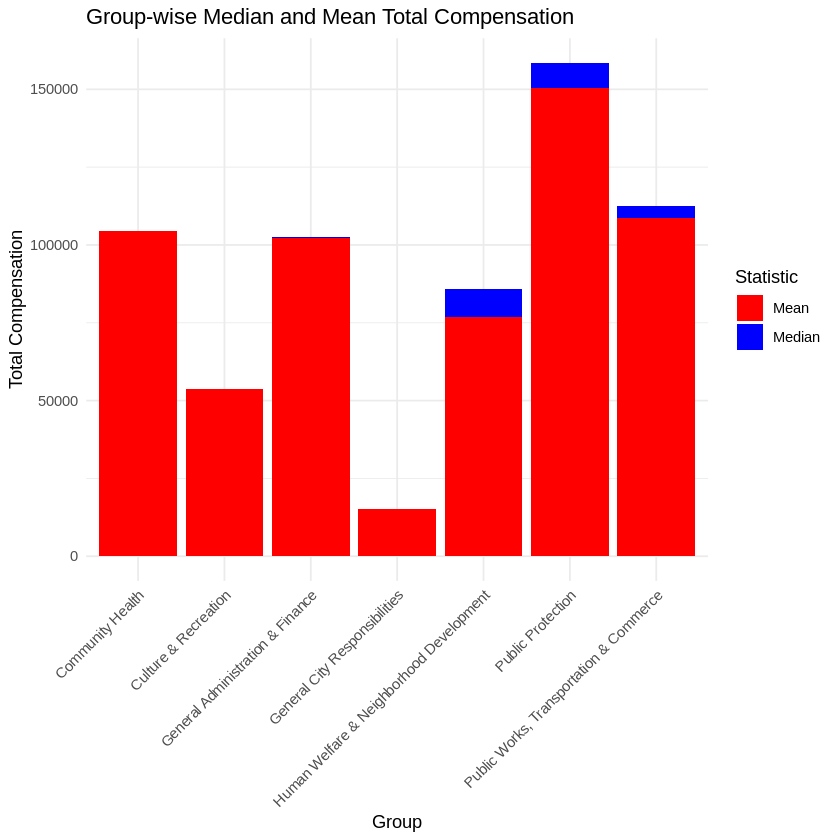

In [ ]:
# Load the ggplot2 library
library(ggplot2)

# Create a data frame with group-wise median and mean Total Compensation
summary_data <- data.frame(
  Group = c("Public Protection", "Public Works, Transportation & Commerce", "Human Welfare & Neighborhood Development",
            "Community Health", "Culture & Recreation", "General Administration & Finance",
            "General City Responsibilities"),
  Median = c(median(group1$Total.Compensation), median(group2$Total.Compensation),
             median(group3$Total.Compensation), median(group4$Total.Compensation),
             median(group5$Total.Compensation), median(group6$Total.Compensation),
             median(group7$Total.Compensation)),
  Mean = c(mean(group1$Total.Compensation), mean(group2$Total.Compensation),
           mean(group3$Total.Compensation), mean(group4$Total.Compensation),
           mean(group5$Total.Compensation), mean(group6$Total.Compensation),
           mean(group7$Total.Compensation))
)

# Create a bar plot with Total compensation on Y axis & Groups on X axis
ggplot(summary_data, aes(x = Group)) +
  geom_bar(aes(y = Median, fill = "Median"), stat = "identity", position = "dodge") +
  geom_bar(aes(y = Mean, fill = "Mean"), stat = "identity", position = "dodge") +
  scale_fill_manual(values = c("Median" = "blue", "Mean" = "red")) +
  labs(title = "Group-wise Median and Mean Total Compensation",
       y = "Total Compensation",
       fill = "Statistic") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


## The plot

displays group-wise median and mean Total Compensation for different organizational groups.

*    The x-axis represents various organizational groups, including "Public Protection," "Public Works, Transportation & Commerce," "Human Welfare & Neighborhood Development," "Community Health," "Culture & Recreation," "General Administration & Finance," and "General City Responsibilities."
*    The y-axis represents the Total Compensation, which is the combination of salaries and other forms of compensation for employees in each group.

 **Insights :**

*   For each organizational group, there are two bars. The blue bars represent the median Total Compensation, while the red bars represent the mean Total Compensation.
*   The difference between the blue (median) and red (mean) bars can provide insights into the distribution of compensation within each group.


*   You can compare the heights of the blue and red bars within each group to understand whether the compensation distribution is skewed. If the median (blue) is significantly lower or higher than the mean (red), it indicates that the compensation distribution may be skewed. it can be observed from the plot that there is no significant skewed distribution among groups.


*   The organization group of "General City Responsibilities" receives absymally lowest total compensation compared to other groups.
*   The "Public Protection Group" receives highest mean & median salaries in terms of total compensation







## Plot 2

 We will check yearly trend of group wise total compensation using another plot in the code below


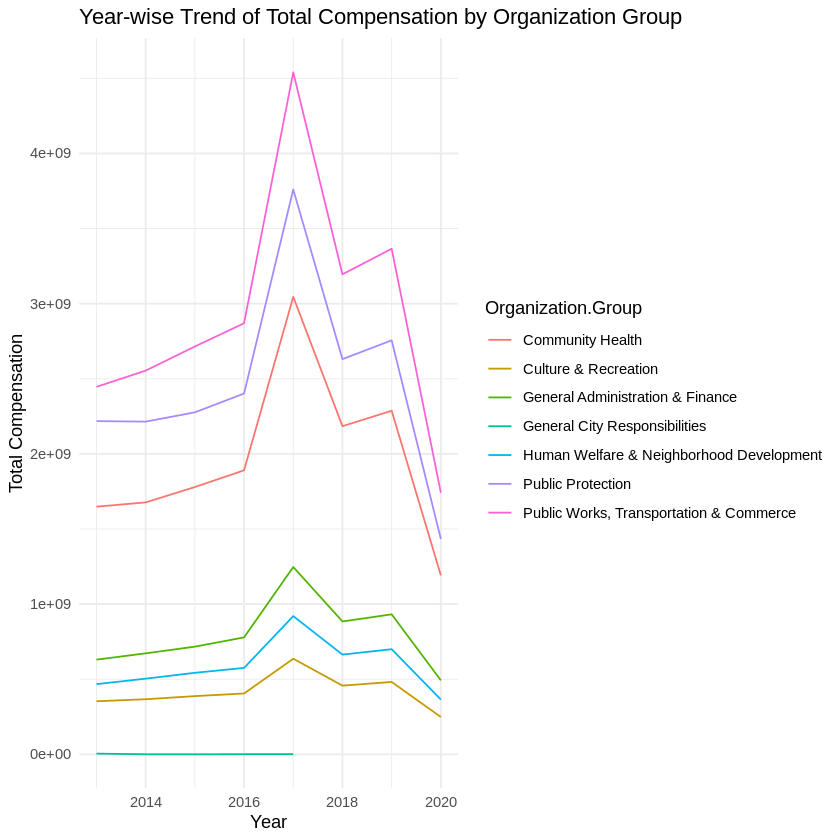

In [ ]:

# Load necessary libraries for plotting
library(ggplot2)

# Group the dataset by Year and Organization Group and calculate the total compensation
yearly_trend <- aggregate(Total.Compensation ~ Year + Organization.Group, data = dataset, FUN = sum)

# Create a line plot for each Organization Group
ggplot(yearly_trend, aes(x = Year, y = Total.Compensation, color = Organization.Group)) +
  geom_line() +
  labs(
    title = "Year-wise Trend of Total Compensation by Organization Group",
    x = "Year",
    y = "Total Compensation"
  ) +
  theme_minimal()









The line plot visualizes the year-wise trend of Total Compensation by different Organization Groups.

*   X-axis (Year): Represents the years under consideration, indicating the time

*   Y-axis (Total Compensation): Represents the cumulative Total Compensation for each year, which combines salaries and other forms of compensation.

*   Lines: Each line on the plot represents a specific Organization Group. The

*   color of the line corresponds to the respective Organization Group.

**Insights**

1. Over the years, the trend in Total Compensation varies among different Organization Groups.

2. Groups shows upward trend in compensation peaking in the year 2017 before a  decline by the end of 2020. This trend is sharp upward & downward in "Community Health", "Public Works, Transportation & Commerce" & "Public Protection" groups which incidently also have higher compensations viz a viz other groups across the timeline.

3. The line graph for the total compensation for the group "General City Responsibilities" is constant,flat & incomplete. This is outlier & might well be the result of data discrepancy apart from the actual case.


## Conditionals

Conditional 1: We filter the dataset to extract data specifically for the "Public Works, Transportation & Commerce" organization group.


In [ ]:
# Conditional 1: Filter for Public Works, Transportation & Commerce group
public_works_data <- subset(dataset, Organization.Group == "Public Works, Transportation & Commerce")

Conditional 2: Within this group, we count the number of unique job titles to understand the diversity of job roles within the organization. The result is displayed as the "Number of unique job titles in Public Works, Transportation & Commerce."

In [ ]:
# Conditional 2: Count unique job titles within the group
unique_job_titles <- unique(public_works_data$Job)
num_unique_titles <- length(unique_job_titles)
cat("Number of unique job titles in Public Works, Transportation & Commerce:", num_unique_titles, "\n")


Number of unique job titles in Public Works, Transportation & Commerce: 678 



Conditional 3: We display a sample of job titles (e.g., the first 10 titles) within the "Public Works, Transportation & Commerce" group. This provides a glimpse of the specific job roles that exist in this organization group.

In [ ]:
# Conditional 3: Display a sample of job titles (e.g., first 10 titles)
sample_job_titles <- head(unique_job_titles, 10)
cat("Sample job titles in Public Works, Transportation & Commerce:\n")
cat(sample_job_titles, sep = "\n")

Sample job titles in Public Works, Transportation & Commerce:
Asst Materials Coordinator
Heavy Equip Ops Asst Sprv
Heavy Equipment Ops Sprv
Operating Engineer, Universal
Painter Supervisor 1
Painter Supervisor 2
Painter
Electrical Inspector
Electrician Supervisor 1
Sprv Electronic Main Tech


Conditional 4 :We find and display the department with the highest average salary from the given dataset. It iterates through all unique departments, calculates the average salary for each department, and tracks the department with the highest average salary.

In [ ]:
departments <- unique(dataset$Department)
max_avg_salary <- 0
max_avg_dept <- ""
for (dept in departments) {
  avg_salary <- mean(dataset$Salaries[dataset$Department == dept])
  if (avg_salary > max_avg_salary) {
    max_avg_salary <- avg_salary
    max_avg_dept <- dept
  }
}
print(paste("Department with the highest average salary:", max_avg_dept))


[1] "Department with the highest average salary: Law Library"


## Loops

1. We create an empty list (trend_by_year) to store results and then:
Retrieve unique years from the dataset for an organization group ("Culture & Recreation"). It then loops through each year, subsetting the dataset for the specified year and organization group & calculates the total compensation for each year.
the year and total compensation is stored in the list.


In [ ]:
# Initialize an empty list to store results
trend_by_year <- list()

# Unique years in the dataset
unique_years <- unique(dataset$Year)

# Loop through each year
for (year in unique_years) {
  # Subset the dataset for the specified year and organization group
  subset_data <- subset(dataset, Year == year & Organization.Group == "Culture & Recreation")

  # Calculate the total compensation for the year
  total_compensation <- sum(subset_data$Total.Compensation)

  # Store the year and total compensation in the list
  trend_by_year[[as.character(year)]] <- total_compensation
}

# Convert the list to a data frame
trend_df <- data.frame(Year = as.numeric(names(trend_by_year)), Total.Compensation = unlist(trend_by_year))

# Print or further analyze the trend_df data frame
print(trend_df)


     Year Total.Compensation
2013 2013          353392734
2014 2014          366756964
2015 2015          387513835
2016 2016          405078002
2017 2017          636302139
2018 2018          457305255
2019 2019          481860036
2020 2020          248321543


2. We create an empty list (retirement_trend_by_year) to store results and then:
Retrieve unique years from the dataset for an organization group ("Culture & Recreation"). It then loops through each year, subsetting the dataset for the specified year and organization group & calculates the retirement benefits for each year.
the year and retirement benefits are stored in the list.


In [ ]:
# Initialize an empty list to store results
retirement_trend_by_year <- list()

# Loop through each year
for (year in unique_years) {
  # Subset the dataset for the specified year and organization group
  subset_data <- subset(dataset, Year == year & Organization.Group == "Culture & Recreation")

  # Calculate the total retirement benefits for the year
  total_retirement_benefits <- sum(subset_data$Retirement)

  # Store the year and total retirement benefits in the list
  retirement_trend_by_year[[as.character(year)]] <- total_retirement_benefits
}

# Convert the list to a data frame
retirement_trend_df <- data.frame(Year = as.numeric(names(retirement_trend_by_year)), Retirement = unlist(retirement_trend_by_year))

# Print or further analyze the retirement_trend_df data frame
print(retirement_trend_df)


     Year Retirement
2013 2013   41277483
2014 2014   47994945
2015 2015   51406356
2016 2016   46945715
2017 2017   74457429
2018 2018   56063587
2019 2019   60035167
2020 2020   33187786


3. We calculated year wise total retirement benefits across data to understand the trend. We used for loop to calculate the total retirement benefits for each unique year in the dataset. It initializes an empty vector to store the results, iterates through the years, subsets the data for each year, calculates the total retirement benefits, and prints the result for each year. The code provides a simple summary of retirement benefits over time

In [ ]:
# Initialize an empty vector to store results
retirement_by_year <- numeric(length(unique_years))

# Loop through each year
for (i in 1:length(unique_years)) {
  year <- unique_years[i]

  # Subset the dataset for the specified year
  subset_data <- dataset[dataset$Year == year, ]

  # Calculate the total retirement benefits for the year
  total_retirement <- sum(subset_data$Retirement)

  # Store the result in the vector
  retirement_by_year[i] <- total_retirement

  # Print the result for the year
  cat("Year:", year, "Total Retirement Benefits:", total_retirement, "\n")
}


Year: 2013 Total Retirement Benefits: 967740952 
Year: 2014 Total Retirement Benefits: 1103888583 
Year: 2015 Total Retirement Benefits: 1167589218 
Year: 2016 Total Retirement Benefits: 1082868131 
Year: 2017 Total Retirement Benefits: 1696789927 
Year: 2018 Total Retirement Benefits: 1245652936 
Year: 2019 Total Retirement Benefits: 1331189668 
Year: 2020 Total Retirement Benefits: 737092987 


## Vector

We define the target_organization_group that we want to focus on e.g., "Culture & Recreation Group" to include only the rows from the specified organization group.
We extract the unique job titles from this subset.
Finally, we create a vector job_titles_vector containing the first 5 unique job titles from the organization group and print it.
This code will give a vector containing the job titles from the specified organization group.

In [ ]:
# Define the target organization group
target_organization_group <- "Culture & Recreation"

# Subset the dataset for the specified organization group
subset_data <- dataset[dataset$Organization.Group == target_organization_group, ]

# Extract unique job titles from the subset
unique_job_titles <- unique(subset_data$Job)

# Create a vector containing the first 5 unique job titles
job_titles_vector <- unique_job_titles[1:5]

# Print the vector
print(job_titles_vector)


[1] "Electrician"               "Executive Secretary 2"    
[3] "Chief Stationary Engineer" "Stationary Engineer"      
[5] "Curator 1"                


 The code below identifies and displays the maximum salary within each unique organization group in the dataset, providing insights into the highest salaries across different groups

In [ ]:
org_group_v <- unique(dataset$Organization.Group)
max_salaries <- vector("numeric", length(org_group_v))

for (i in 1:length(org_group_v)) {
  max_salaries[i] <- max(dataset$Salaries[dataset$Organization.Group == org_group_v[i]])
}

# Print the maximum salaries for each department
for (i in 1:length(org_group_v)) {
  cat("Organization Group:", org_group_v[i], "- Maximum Salary:", max_salaries[i], "\n")
}



Organization Group: Public Protection - Maximum Salary: 651936.7 
Organization Group: Public Works, Transportation & Commerce - Maximum Salary: 403152.9 
Organization Group: Human Welfare & Neighborhood Development - Maximum Salary: 328319.2 
Organization Group: Community Health - Maximum Salary: 465612 
Organization Group: Culture & Recreation - Maximum Salary: 275644 
Organization Group: General Administration & Finance - Maximum Salary: 584297.6 
Organization Group: General City Responsibilities - Maximum Salary: 120000 


It can be seen that within the groups, Public Protection group has maximum salary viz a viz that of other groups

## Summary




1. Among the top 10 earners based on Total Compensation, it is evident that the "General Administration & Finance" group holds a dominant position, closely followed by the "Public Protection Group."

2. Conversely, when considering the lowest 20 earners based on Salaries, there is no particular group that exhibits dominance, signifying a more balanced distribution of low incomes.

3. Notably, the "General City Responsibilities" organization group receives significantly lower total compensation compared to other groups. It must be getting increasingly more difficult for them to live in the city

4. The "Public Protection Group" stands out with the highest mean and median salaries in terms of total compensation.

5. Over time, there is a noticeable upward trend in compensation across various groups, peaking in 2017 before experiencing a decline by the end of 2020. This trend is particularly sharp in the "Community Health," "Public Works, Transportation & Commerce," and "Public Protection" groups, which also maintain higher compensation levels compared to other groups throughout the analyzed period.

6. Looking at the departments, the "Law Library" stands out with the highest average salary.

7. In a year-wise analysis, Total Retirement Benefits across all groups show an upward trend until 2017, where it reached its peak at $1,696,789,927 USD, which is the highest recorded. Subsequently, there was a decline.

8. Within the groups, it is evident that the "Public Protection Group" consistently offers the highest salaries, with an average of $651,936.7 USD, surpassing other groups in this aspect.






## Recommendations

Based on the findings of the analysis, here are several key insights and recommendations regarding income in the city of San Francisco, which can be incorporated into an article:

1. **Income Disparities Among Top Earners**: The data reveals a significant income disparity among the top earners in San Francisco. The "General Administration & Finance" group prominently leads this category, followed closely by the "Public Protection Group." This suggests that certain employment sectors in the city offer significantly higher compensation packages.

2. **Balanced Distribution of Low Incomes**: On the other end of the spectrum, when considering the lowest 20 earners based on salaries, there is no clear dominance of any particular group. This signifies a more balanced distribution of low incomes, highlighting diversity in employment sectors.

3. **Challenges for "General City Responsibilities" Group**: Notably, the "General City Responsibilities" organization group receives substantially lower total compensation compared to other groups. This raises concerns about the affordability of living in the city for these employees, and further investigation is needed to understand their unique circumstances.

4. **"Public Protection Group" as Salary Leaders**: The "Public Protection Group" consistently stands out with the highest mean and median salaries in terms of total compensation. This group's high salaries may be attributed to the nature of their work and the importance placed on public safety roles.

5. **Income Trends and Real Salaries**: Over time, there is a noticeable upward trend in compensation across various groups, peaking in 2017 before experiencing a decline by the end of 2020. This trend is particularly pronounced in certain groups such as "Community Health," "Public Works, Transportation & Commerce," and "Public Protection." It is important to note that when adjusted for inflation, real salaries across all groups have either plateaued or declined over the past five years, which is a matter of concern for residents.

6. **Notable Department - "Law Library"**: Among the city departments, the "Law Library" stands out with the highest average salary. This may indicate the importance placed on legal services within the city government.

7. **Retirement Benefits Challenges**: A year-wise analysis of Total Retirement Benefits shows an upward trend until 2017, reaching its peak at $1,696,789,927 USD. However, subsequent declines suggest that retirement benefits, when not accounting for inflation, are decreasing. This poses potential challenges for retirees, necessitating a review of retirement policies and provisions.

8. **"Public Protection Group" Leading in Salaries**: Within the groups, it is evident that the "Public Protection Group" consistently offers the highest salaries, with an average of $651,936.7 USD, surpassing other groups in this aspect. This group's strong compensation package should be analyzed further to understand its dynamics and implications.

These insights provide a comprehensive view of income dynamics in San Francisco, highlighting both disparities and trends. It is crucial for policymakers, employers, and residents to consider these findings when addressing income-related issues and improving the quality of life for all individuals in the city.